# Chain data

## Data providers
**Advantages:** human readable data, no issues about storing and decoding, only aggregating and visualizing
**Risks & disadvantages:  **paid subscription, dependency on the data provider, legally bound to cite the data provider

Messari https://messari.io/screener

The Block https://www.theblock.co/data/crypto-markets/spot

CoinGecko https://www.coingecko.com/

CoinMetrics https://coinmetrics.io/

Dune Analytics
https://dune.com/home

The Graph API https://thegraph.com/en/

## Etherscan API and other mediators (“block explorers”)
**Advantages:** No mention of the necessity to cite them as data source, relatively easy Python library to work with

**Risks & disadvantages:**  paid subscription, different for other chains (for BUSD we will have to use https://bscscan.com/ and so on), aggregating data and visualization issues
## Blockchain Node Providers + (EVM) API
**Advantages:** free (? not sure about blockchain providers), API is the same for all EVM chains

**Risks & disadvantages: **relying on blockchain node providers, difficulties for other blockchains besides Ethereum (a different API, different node providers), decoding raw data (initial data as hashed bytecode), storing and aggregating data issues, visualization
Decoding requires extensive blockchain knowledge to understand and interpret.
Blockchain Node Providers
https://www.alchemy.com/overviews/blockchain-node-providers

The approach is used by **the Dune**. How does it work:

1. A chain adds a block
2. Node providers transmit data to Dune
3. Dune adds raw data to SQL tables
5. Decoding of raw data using the smart contract’s Application Binary Interface (ABI)
6. Building SQL queries and further data visualization
## Own node + (EVM) API

**Advantages:** no mediators of any kind, the most risk robust method

**Risks:** have to run a physical device at least 6 hours per day, no assistance in tech maintenance,  one node might not be enough for one chain (?), tech complexity, decoding raw data, storing and aggregating data issues, visualization, difficulties with other blockchains besides Ethereum (one needs to run a new node for every chain)
Decoding requires extensive blockchain knowledge to understand and interpret.


The approach is used by **the Graph**. How does it work:
1. A decentralized application adds data to Ethereum through a transaction on a smart contract.
2. The smart contract emits one or more events while processing the transaction.
3. Graph Node continually scans Ethereum for new blocks and the data for your subgraph they may contain.
4. Graph Node finds Ethereum events for your subgraph in these blocks and runs the mapping handlers you provided. The mapping is a WASM module that creates or updates the data entities that Graph Node stores in response to Ethereum events.
5. The decentralized application queries the Graph Node for data indexed from the blockchain, using the node's GraphQL endpoint. The Graph Node in turn translates the GraphQL queries into queries for its underlying data store in order to fetch this data, making use of the store's indexing capabilities. The decentralized application displays this data in a rich UI for end-users, which they use to issue new transactions on Ethereum. The cycle repeats.

## Conditions necessary to run own node:

Desktop or laptop hardware running recent versions of Windows, Mac OS X, or Linux.

200 gigabytes of free disk space, accessible at a minimum read/write speed of 100 MB/s.

2 gigabytes of memory (RAM)

A broadband Internet connection with upload speeds of at least 400 kilobits (50 kilobytes) per second

An unmetered connection, a connection with high upload limits, or a connection you regularly monitor to ensure it doesn’t exceed its upload limits. It’s common for full nodes on high-speed connections to use 200 gigabytes of upload or more a month. Download usage is around 20 gigabytes a month, plus around an additional 195 gigabytes the first time you start your node.

6 hours a day that your full node can be left running. (You can do other things with your computer while running a full node.) More hours would be better, and best of all would be if you can run your node continuously.


# Stablecoins

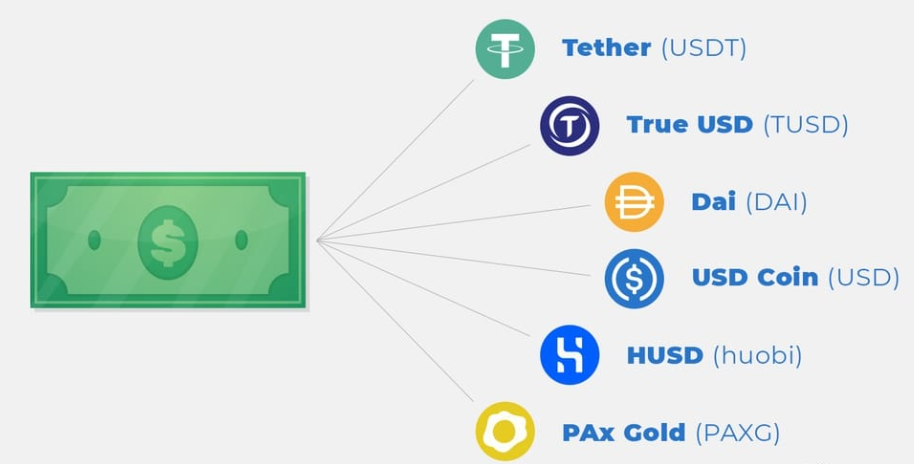

# Metrics

## USD denominated closing price


The fixed closing price of the asset as of 00:00 UTC the following day (i.e., midnight UTC of the current day) denominated in USD. This price is generated by Coin Metrics' fixing/reference rate service. Real-time PriceUSD is the fixed closing price of the asset as of the timestamp set by the block's miner.
## Adjusted transaction value (in native units)


The sum of native units transferred between distinct addresses that interval removing noise and certain artifacts.
## 1 year active supply



The sum of unique native units that transacted at least once in the trailing 1 year up to the end of that interval. Native units that transacted more than once are only counted once.
## Current supply (native units)


The sum of all native units ever created and visible on the ledger (i.e., issued) at the end of that interval. For account-based protocols, only accounts with positive balances are counted.
## 1 year current supply velocity



The ratio of the value transferred (i.e., the aggregate size of all transfers) in the trailing 1 year divided by the current supply up to the end of that interval. It can be thought of as a rate of turnover -- the number of times that an average native unit has been transferred in the past 1 year.
## Active supply


The sum of unique native units that transacted at least once in the trailing 180, 90 or 30 days up to the end of that interval. Native units that transacted more than once are only counted once.


## Reserve composition
The number of funds allocated to different security of stablecoin issuer.



In [1]:
#importing necessary libraries
from os import environ
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
from datetime import timezone as timezone_info
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive
#drive.mount('/content/drive')

# Price distribution and peg stability

**Peg stability of stablecoins** is an indicator of how well the stablecoin maintains its peg to the underlying asset or currency. The stability of a stablecoin's peg can be assessed by analyzing its exchange rate compared to the pegged asset or currency over time, using market data from cryptocurrency exchanges.

**Mean** gives an idea about the average price of stablecoin over a selected period.

As a measure of dispersion, the graph shows **standard deviation**. This metric compares the stablecoin's exchange rate to the pegged asset or currency and calculates the standard deviation from the peg. A stablecoin with a low standard deviation is considered more stable.

The stability of a stablecoin's peg is important for ensuring it is a reliable store of value and can be used for transactions. Additionally, it helps to establish trust in the stablecoin and encourages wider adoption among users.

The **histogram plot** of price distribution gives a visual representation of all prices for a given stablecoin over a selected time period. The breaks of a histogram are predefined to show differences of 0.001. The histogram plot is accompanied by a density curve that smoothes the data points for the purpose of describing the presented distribution. The density curve is non-parametric and it does not assume any specific distributional form for the underlying data, thus the non-normal distribution of coin price is not problematic.


In [3]:
df_prices=pd.read_excel(r'price.xlsx')
# Convert 'Time' column to datetime format
df_prices['Time'] = pd.to_datetime(df_prices['Time'])
df_prices

Time           BTC      BUSD       DAI      GUSD  HUSD       PAX  \
0    2010-07-18      0.085840       NaN       NaN       NaN   NaN       NaN   
1    2010-07-19      0.080800       NaN       NaN       NaN   NaN       NaN   
2    2010-07-20      0.074736       NaN       NaN       NaN   NaN       NaN   
3    2010-07-21      0.079193       NaN       NaN       NaN   NaN       NaN   
4    2010-07-22      0.058470       NaN       NaN       NaN   NaN       NaN   
...         ...           ...       ...       ...       ...   ...       ...   
4667 2023-04-28  29350.811887  1.000467  1.000031  0.996988   NaN  0.998789   
4668 2023-04-29  29221.514508  1.000395  1.000015  0.997559   NaN  0.998062   
4669 2023-04-30  29362.086797  1.000245  0.999055  1.003143   NaN  0.998721   
4670 2023-05-01  28114.953187  0.999842  0.999925  0.998301   NaN  0.995786   
4671 2023-05-02  28690.580996  1.000523  1.000182  1.000472   NaN  0.994219   

          TUSD      USDC  USDK      USDT  USDT_ETH  USDT_TRX  
0          NaN       NaN   NaN       NaN       NaN       NaN  
1          NaN       NaN   NaN       NaN       NaN       NaN  
2          NaN       NaN   NaN       NaN       NaN       NaN  
3          NaN       NaN   NaN       NaN       NaN       NaN  
4          NaN       NaN   NaN       NaN       NaN       NaN  
...        ...       ...   ...       ...       ...       ...  
4667  1.000009  1.000187   NaN  1.000686  1.000686  1.000686  
4668  0.999933  1.000311   NaN  1.000589  1.000589  1.000589  
4669  1.008783  1.000327   NaN  1.000432  1.000432  1.000432  
4670  1.003087  1.000443   NaN  1.000210  1.000210  1.000210  
4671  0.999884  1.000372   NaN  1.000521  1.000521  1.000521  

[4672 rows x 13 columns]

In [4]:
df_prices['USDT'] = df_prices['USDT'] + df_prices['USDT_ETH'] + df_prices['USDT_TRX']
df_prices


Time           BTC      BUSD       DAI      GUSD  HUSD       PAX  \
0    2010-07-18      0.085840       NaN       NaN       NaN   NaN       NaN   
1    2010-07-19      0.080800       NaN       NaN       NaN   NaN       NaN   
2    2010-07-20      0.074736       NaN       NaN       NaN   NaN       NaN   
3    2010-07-21      0.079193       NaN       NaN       NaN   NaN       NaN   
4    2010-07-22      0.058470       NaN       NaN       NaN   NaN       NaN   
...         ...           ...       ...       ...       ...   ...       ...   
4667 2023-04-28  29350.811887  1.000467  1.000031  0.996988   NaN  0.998789   
4668 2023-04-29  29221.514508  1.000395  1.000015  0.997559   NaN  0.998062   
4669 2023-04-30  29362.086797  1.000245  0.999055  1.003143   NaN  0.998721   
4670 2023-05-01  28114.953187  0.999842  0.999925  0.998301   NaN  0.995786   
4671 2023-05-02  28690.580996  1.000523  1.000182  1.000472   NaN  0.994219   

          TUSD      USDC  USDK      USDT  USDT_ETH  USDT_TRX  
0          NaN       NaN   NaN       NaN       NaN       NaN  
1          NaN       NaN   NaN       NaN       NaN       NaN  
2          NaN       NaN   NaN       NaN       NaN       NaN  
3          NaN       NaN   NaN       NaN       NaN       NaN  
4          NaN       NaN   NaN       NaN       NaN       NaN  
...        ...       ...   ...       ...       ...       ...  
4667  1.000009  1.000187   NaN  3.002058  1.000686  1.000686  
4668  0.999933  1.000311   NaN  3.001767  1.000589  1.000589  
4669  1.008783  1.000327   NaN  3.001297  1.000432  1.000432  
4670  1.003087  1.000443   NaN  3.000631  1.000210  1.000210  
4671  0.999884  1.000372   NaN  3.001564  1.000521  1.000521  

[4672 rows x 13 columns]

In [5]:

# Pivot the 'BUSD', 'USDC', and 'USDT' columns to 'coin' and 'price'
df_prices2 = pd.melt(df_prices, id_vars=['Time'], value_vars=['BUSD', 'USDC', 'USDT'],
                var_name='coin', value_name='price')
df_prices2

Time  coin     price
0     2010-07-18  BUSD       NaN
1     2010-07-19  BUSD       NaN
2     2010-07-20  BUSD       NaN
3     2010-07-21  BUSD       NaN
4     2010-07-22  BUSD       NaN
...          ...   ...       ...
14011 2023-04-28  USDT  3.002058
14012 2023-04-29  USDT  3.001767
14013 2023-04-30  USDT  3.001297
14014 2023-05-01  USDT  3.000631
14015 2023-05-02  USDT  3.001564

[14016 rows x 3 columns]

In [6]:
import plotly.express as px

# Create a line chart with hover effect
fig = px.line(df_prices2[df_prices2['Time'] >= '2017-01-01'], x='Time', y='price', color='coin',
              title='Time Series Line Chart of Coin Prices',
              hover_data={'Time': '|%Y-%m-%d', 'price': ':.2f'})

# Show the chart
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [7]:
# Create a line chart with hover effect
fig2 = px.line(df_prices[df_prices['Time'] >= '2017-01-01'], x='Time', y='BTC',
              title='Time Series Line Chart of BTC Price',
              hover_data={'Time': '|%Y-%m-%d', 'BTC': ':.2f'})

# Show the chart
fig2.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [8]:
# Filter the time frame of the data
# Select subset of rows where 'Time' is after January 1, 2022
df_prices = df_prices[df_prices['Time'] >= '2022-01-01']


df_prices

Time           BTC      BUSD       DAI      GUSD      HUSD  \
4185 2022-01-01  47560.009382  1.000129  0.999940  1.000268  1.000065   
4186 2022-01-02  47352.557757  0.999953  0.999996  0.998740  1.000077   
4187 2022-01-03  46453.432352  0.999964  0.999958  0.999092  1.000031   
4188 2022-01-04  45905.961122  1.000032  0.999935  0.999963  1.000027   
4189 2022-01-05  43530.944039  1.000198  0.999817  0.999946  1.000077   
...         ...           ...       ...       ...       ...       ...   
4667 2023-04-28  29350.811887  1.000467  1.000031  0.996988       NaN   
4668 2023-04-29  29221.514508  1.000395  1.000015  0.997559       NaN   
4669 2023-04-30  29362.086797  1.000245  0.999055  1.003143       NaN   
4670 2023-05-01  28114.953187  0.999842  0.999925  0.998301       NaN   
4671 2023-05-02  28690.580996  1.000523  1.000182  1.000472       NaN   

           PAX      TUSD      USDC      USDK      USDT  USDT_ETH  USDT_TRX  
4185  0.992698  0.999970  1.000079  1.000245  3.000559  1.000186  1.000186  
4186  0.996581  1.000102  0.999968  0.999900  3.000587  1.000196  1.000196  
4187  0.997166  0.999392  1.000053  0.999870  3.000256  1.000085  1.000085  
4188  0.999185  1.000035  0.999968  0.999720  2.999532  0.999844  0.999844  
4189  0.993120  0.999443  1.000083  0.999978  3.000079  1.000026  1.000026  
...        ...       ...       ...       ...       ...       ...       ...  
4667  0.998789  1.000009  1.000187       NaN  3.002058  1.000686  1.000686  
4668  0.998062  0.999933  1.000311       NaN  3.001767  1.000589  1.000589  
4669  0.998721  1.008783  1.000327       NaN  3.001297  1.000432  1.000432  
4670  0.995786  1.003087  1.000443       NaN  3.000631  1.000210  1.000210  
4671  0.994219  0.999884  1.000372       NaN  3.001564  1.000521  1.000521  

[487 rows x 13 columns]

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

# Define the thresholds
below_0999 = 0.995
above_1001 = 1.005
bincount=20
# Create histogram bins
bins = [below_0999 + i * (above_1001 - below_0999) / bincount for i in range(bincount+2)]

# Create custom text for the bar labels
custom_text = ["Below "+str(below_0999)] + [""] * (bincount-1) + ["Above "+str(above_1001)]
def create_traces(price_column):
    # Count occurrences below and above the thresholds
    below_count = (df_prices[price_column] < below_0999).sum()
    above_count = (df_prices[price_column] > above_1001).sum()

    # Filter DataFrame for the remaining prices
    filtered_df = df_prices[(df_prices[price_column] >= below_0999) & (df_prices[price_column] <= above_1001)]

    # Compute the histogram
    counts, edges = np.histogram(filtered_df[price_column], bins=bins)

    # Add the counts for the below and above threshold bins
    counts[0] += below_count - 1
    counts[-1] += above_count - 1

    # Create hover labels for the bins
    hover_text = [None] * 16
    hover_text[1:-1] = [f"{edges[i]:.4f}-{edges[i+1]:.4f}" for i in range(len(edges)-1)]

    # Create histogram trace
    bar_trace = go.Bar(x=edges[:-1], y=counts, width=[edges[i+1] - edges[i] for i in range(len(edges) - 1)],
                       marker=dict(color="#FFB81C", line=dict(width=1, color="grey")),
                       text=custom_text, textposition="auto", textfont=dict(color="black"),
                       hoverinfo="text", hovertext=hover_text)

    # Create rug plot trace
    rug_trace = go.Scatter(x=df_prices[price_column], y=[0] * len(df_prices), mode='markers',
                           marker=dict(color='#FFB81C', symbol='line-ns-open', size=6, line=dict(width=1)))

    return bar_trace, rug_trace
# Load the stablecoin prices DataFrame
df_prices = df_prices

# Create the initial traces
usdt_bar_trace, usdt_rug_trace = create_traces("USDT")

# Create the subplots
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                       specs=[[{}], [{}]], row_heights=[0.9, 0.1])

# Add the traces to the subplots
fig.add_trace(usdt_bar_trace, row=1, col=1)
fig.add_trace(usdt_rug_trace, row=2, col=1)

# Create the update menu
def create_update_menu(price_column):
    bar_trace, rug_trace = create_traces(price_column)
    return [{"args": [{"y": [bar_trace.y], "x": [bar_trace.x]}, {"y": [rug_trace.y], "x": [rug_trace.x]}],
             "label": price_column,
             "method": "update"}]

updatemenus = [dict(
    buttons=create_update_menu("USDT") + create_update_menu("DAI") + create_update_menu("USDC") + create_update_menu("PAX") + create_update_menu("GUSD") + create_update_menu("BUSD")+create_update_menu("TUSD")+create_update_menu("USDK") + create_update_menu("BTC"),
    showactive=True,
    direction="down",
    x=1.15,
    xanchor="left",
    y=1.07,
    yanchor="top"
)]

#
fig.update_xaxes(range=[below_0999 - 0.0003, above_1001 + 0.0003])

# Update the layout
fig.update_layout(
    title="Stablecoin Price Distribution",
    xaxis_title="Price in USD",
)
# Update the layout
fig.update_layout(
    title="Stablecoin Price Distribution",
    xaxis_title="Price in USD",
    yaxis_title="Count",
    plot_bgcolor='white',
    paper_bgcolor='white',
    hoverlabel=dict(bgcolor="#FFB81C", font=dict(color="black")),
    updatemenus=updatemenus
)

fig.show()


In [10]:
# Create a histogram with hover effect
fig_BTC = px.histogram(df_prices, x="BTC", nbins=40,hover_data={'BTC': ':.2f'}, opacity=0.7, color_discrete_sequence=['#636EFA'])
fig.update_layout(title='Histogram of USDT Total', xaxis_title='BTC price', yaxis_title='Count')

# Show the chart
fig_BTC.show()

Text(0.5, 1.0, 'Density Plot of BUSD, USDC, and USDT')

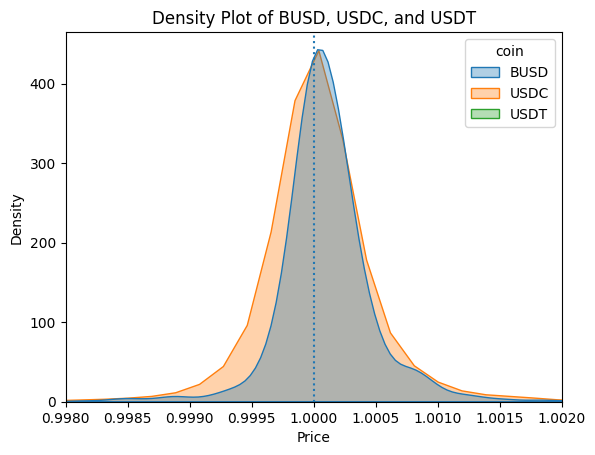

In [11]:

import seaborn as sns

# Create a density plot with color fill and grouped by 'coin'
sns.kdeplot(x='price', hue='coin', data=df_prices2 , fill=True, alpha=0.35)

# Add a vertical line at x=1 with dotted line style
plt.axvline(x=1, linestyle='dotted')
# Add X limits
plt.xlim(left=0.998, right=1.002)


# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of BUSD, USDC, and USDT')

In [12]:
#Create a density plot with color fill and grouped by 'coin'
fig = px.histogram(df_prices2, x='price', color='coin', nbins=100,
opacity=0.7, barmode='overlay',
marginal='rug', histnorm='density',
title='Plot of BUSD, USDC, and USDT')

#Add a vertical line at x=1 with dotted line style
fig.add_shape(type='line', x0=1, x1=1, line=dict(dash='dot'))

#Add X limits
fig.update_layout(xaxis_range=[0.998, 1.002])

#Add labels and title
fig.update_layout(xaxis_title='Price', yaxis_title='Density')
fig.show()

# Price Statistics, depegged observations and breaking the band

"**Breaking the band**" for a stablecoin means the price of the stablecoin has moved outside the acceptable range from its target value, typically set at 1:1 with the asset it is pegged to. The "band" refers to the range of acceptable deviations from the target value. For example, a stablecoin might have a band of ±1% around its target value, meaning that it is considered to be within an acceptable range as long as it trades within 1% above or below the target value. According to IMF classification, a 1% is seen as a conventional fluctuation maximum of deviation from the peg in monetary policy frameworks. If the stablecoin's price moves outside of this band, it is considered to have broken the band. When a stablecoin breaks the band, it can indicate a loss of confidence in the stablecoin and may result in increased volatility or even a collapse of the stablecoin's price. The issuer may take action to restore the price by adjusting the supply or by changing the composition of the backing assets.

In [13]:
import pandas as pd

# Define the peg range for all stablecoins
lower_bound = 0.999
upper_bound = 1.001

# Create a new column to indicate whether each stablecoin is within the peg range
df_prices['InPegRange'] = df_prices.apply(lambda row: all([lower_bound <= row[col] <= upper_bound for col in df_prices.columns[1:]]), axis=1)

# Calculate the number of continuous days all stablecoins stay depegged
df_prices['DepeggedStreak'] = 0
streak = 0

for i, row in df_prices.iterrows():
    if not row['InPegRange']:
        streak += 1
        df_prices.at[i, 'DepeggedStreak'] = streak
    else:
        streak = 0

# Drop the InPegRange columns
df_prices = df_prices.drop(columns=[col for col in df_prices.columns if 'InPegRange' in col])
df_prices_dep =  df_prices.drop(columns=[col for col in df_prices.columns if 'InPegRange' in col])
df_prices = df_prices.drop(columns="DepeggedStreak")

# Print the periods when all stablecoins break the peg and the number of days they stay depegged continuously
depegged_periods = df_prices_dep[df_prices_dep['DepeggedStreak'] > 0]

df_prices

<ipython-input-13-5161f41b010a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-5161f41b010a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time           BTC      BUSD       DAI      GUSD      HUSD  \
4185 2022-01-01  47560.009382  1.000129  0.999940  1.000268  1.000065   
4186 2022-01-02  47352.557757  0.999953  0.999996  0.998740  1.000077   
4187 2022-01-03  46453.432352  0.999964  0.999958  0.999092  1.000031   
4188 2022-01-04  45905.961122  1.000032  0.999935  0.999963  1.000027   
4189 2022-01-05  43530.944039  1.000198  0.999817  0.999946  1.000077   
...         ...           ...       ...       ...       ...       ...   
4667 2023-04-28  29350.811887  1.000467  1.000031  0.996988       NaN   
4668 2023-04-29  29221.514508  1.000395  1.000015  0.997559       NaN   
4669 2023-04-30  29362.086797  1.000245  0.999055  1.003143       NaN   
4670 2023-05-01  28114.953187  0.999842  0.999925  0.998301       NaN   
4671 2023-05-02  28690.580996  1.000523  1.000182  1.000472       NaN   

           PAX      TUSD      USDC      USDK      USDT  USDT_ETH  USDT_TRX  
4185  0.992698  0.999970  1.000079  1.000245  3.000559  1.000186  1.000186  
4186  0.996581  1.000102  0.999968  0.999900  3.000587  1.000196  1.000196  
4187  0.997166  0.999392  1.000053  0.999870  3.000256  1.000085  1.000085  
4188  0.999185  1.000035  0.999968  0.999720  2.999532  0.999844  0.999844  
4189  0.993120  0.999443  1.000083  0.999978  3.000079  1.000026  1.000026  
...        ...       ...       ...       ...       ...       ...       ...  
4667  0.998789  1.000009  1.000187       NaN  3.002058  1.000686  1.000686  
4668  0.998062  0.999933  1.000311       NaN  3.001767  1.000589  1.000589  
4669  0.998721  1.008783  1.000327       NaN  3.001297  1.000432  1.000432  
4670  0.995786  1.003087  1.000443       NaN  3.000631  1.000210  1.000210  
4671  0.994219  0.999884  1.000372       NaN  3.001564  1.000521  1.000521  

[487 rows x 13 columns]

In [14]:
import plotly.graph_objs as go


# Define the peg range
lower_bound = 0.999
upper_bound = 1.001

# Create a plot for each stablecoin in the DataFrame
for col in df_prices.columns[1:4]:
    # Create a trace for the stablecoin price
    price_trace = go.Scatter(x=df_prices['Time'], y=df_prices[col], mode='lines', name='Price')

    # Create a trace for the depegged areas
    in_peg_range_trace = go.Scatter(
        x=df_prices['Time'],
        y=df_prices[col].where(df_prices[col].between(lower_bound, upper_bound), 0),
        mode='lines',
        name='In Peg Range',
        line=dict(width=0),
        fill='tozerox',
        fillcolor='#FFB81C',
        showlegend=False,
    )

    # Define the plot layout
    layout = go.Layout(
        title=f'{col} Price, Depegged areas',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price', range=[0.9, 1.1]),
        plot_bgcolor='white',
        paper_bgcolor='white',
        hoverlabel=dict(bgcolor="#FFB81C", font=dict(color="black")),
    )

    # Combine the traces and layout into a figure
    fig = go.Figure(data=[in_peg_range_trace, price_trace], layout=layout)

    # Display the figure
    fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [15]:
def count_instances(df, threshold):
    count = 0
    for col in df.columns:
        if 'DepeggedStreak' in col:
            depegged_periods = df[df[col] > threshold]

            if not depegged_periods.empty:
                count += 1
                print(f'{col}: {len(depegged_periods)}'+ " instances")

count_instances(df_prices, 1)
depegged_periods

Time           BTC      BUSD       DAI      GUSD      HUSD  \
4185 2022-01-01  47560.009382  1.000129  0.999940  1.000268  1.000065   
4186 2022-01-02  47352.557757  0.999953  0.999996  0.998740  1.000077   
4187 2022-01-03  46453.432352  0.999964  0.999958  0.999092  1.000031   
4188 2022-01-04  45905.961122  1.000032  0.999935  0.999963  1.000027   
4189 2022-01-05  43530.944039  1.000198  0.999817  0.999946  1.000077   
...         ...           ...       ...       ...       ...       ...   
4667 2023-04-28  29350.811887  1.000467  1.000031  0.996988       NaN   
4668 2023-04-29  29221.514508  1.000395  1.000015  0.997559       NaN   
4669 2023-04-30  29362.086797  1.000245  0.999055  1.003143       NaN   
4670 2023-05-01  28114.953187  0.999842  0.999925  0.998301       NaN   
4671 2023-05-02  28690.580996  1.000523  1.000182  1.000472       NaN   

           PAX      TUSD      USDC      USDK      USDT  USDT_ETH  USDT_TRX  \
4185  0.992698  0.999970  1.000079  1.000245  3.000559  1.000186  1.000186   
4186  0.996581  1.000102  0.999968  0.999900  3.000587  1.000196  1.000196   
4187  0.997166  0.999392  1.000053  0.999870  3.000256  1.000085  1.000085   
4188  0.999185  1.000035  0.999968  0.999720  2.999532  0.999844  0.999844   
4189  0.993120  0.999443  1.000083  0.999978  3.000079  1.000026  1.000026   
...        ...       ...       ...       ...       ...       ...       ...   
4667  0.998789  1.000009  1.000187       NaN  3.002058  1.000686  1.000686   
4668  0.998062  0.999933  1.000311       NaN  3.001767  1.000589  1.000589   
4669  0.998721  1.008783  1.000327       NaN  3.001297  1.000432  1.000432   
4670  0.995786  1.003087  1.000443       NaN  3.000631  1.000210  1.000210   
4671  0.994219  0.999884  1.000372       NaN  3.001564  1.000521  1.000521   

      DepeggedStreak  
4185               1  
4186               2  
4187               3  
4188               4  
4189               5  
...              ...  
4667             483  
4668             484  
4669             485  
4670             486  
4671             487  

[487 rows x 14 columns]

In [16]:
# Calculate and print the maximum value of the depegged streaks for each stablecoin
for col in df_prices.columns[1:]:
    if '_DepeggedStreak' in col:
        max_depegged_streak = df_prices[col].max()
        print(f'The maximum depegged streak for {col[:-15]} is {max_depegged_streak} days.')

# Calculate and print the median continuous depegged streak for each stablecoin
for col in df_prices.columns[1:]:
    if '_DepeggedStreak' in col:
        median_depegged_streak = df_prices[col].median()
        print(f'The median continuous depegged streak for {col[:-15]} is {median_depegged_streak} days.')


In [17]:
for col in df_prices.columns[1:4]:
        p5_range = np.percentile(df_prices[col], 5)
        p10_range = np.percentile(df_prices[col], 10)
        p90_range = np.percentile(df_prices[col], 90)
        p95_range = np.percentile(df_prices[col], 95)
        # Calculate the upper and lower bounds for the 90th and 95th percentiles
        lower_90 = p10_range
        upper_90 = p90_range
        lower_95 = p5_range
        upper_95 = p95_range

        print(f"90th Percentile Range for {col}: ({lower_90}, {upper_90})")
        print(f"95th Percentile Range for {col}: ({lower_95}, {upper_95})")
        print("---------------------------------------------------------------------------")

90th Percentile Range for BTC: (17073.27181350092, 42181.34025225014)
95th Percentile Range for BTC: (16690.90470850379, 43806.58889269436)
---------------------------------------------------------------------------
90th Percentile Range for BUSD: (0.9997547939459748, 1.000257616626706)
95th Percentile Range for BUSD: (0.999653210230142, 1.00046047515935)
---------------------------------------------------------------------------
90th Percentile Range for DAI: (0.9996190221535236, 1.000044013606082)
95th Percentile Range for DAI: (0.999533631701042, 1.000090640330425)
---------------------------------------------------------------------------


## MarketCap (The sum USD value of the current supply)

The market capitalization (market cap) of stablecoins represents the total value of all units of the stablecoins in circulation. It is calculated by multiplying the current price of a stablecoin by the total number of units of that stablecoin in circulation.

A graph of market cap for stablecoins over time can be used to track the adoption and popularity of stablecoins in the cryptocurrency market. An increasing market cap indicates that more people are using stablecoins for various purposes, such as trading, remittance, or as a store of value, while a decreasing market cap could indicate a decrease in demand for stablecoins.

A graph of market cap for stablecoins can also provide insights into the overall state of the cryptocurrency market. For example, during periods of high market volatility, investors may flock to stablecoins as a safe haven, leading to an increase in market cap. On the other hand, during periods of high market optimism, stablecoin market cap may decrease as investors move towards riskier cryptocurrencies.

In [18]:
df_mcap=pd.read_excel(r'mcap.xlsx')
df_mcap=df_mcap.fillna(0)
df_mcap['Time'] = pd.to_datetime(df_mcap['Time']).dt.date
df_mcap=df_mcap[-1080:]
df_mcap=df_mcap.reset_index(drop=True)
df_mcap

Time           BTC          BUSD           DAI          GUSD  \
0     2017-05-03  2.477970e+10  0.000000e+00  0.000000e+00  0.000000e+00   
1     2017-05-04  2.511597e+10  0.000000e+00  0.000000e+00  0.000000e+00   
2     2017-05-05  2.495566e+10  0.000000e+00  0.000000e+00  0.000000e+00   
3     2017-05-06  2.566750e+10  0.000000e+00  0.000000e+00  0.000000e+00   
4     2017-05-07  2.490361e+10  0.000000e+00  0.000000e+00  0.000000e+00   
...          ...           ...           ...           ...           ...   
1075  2020-04-12  1.278550e+11  1.884807e+08  6.682372e+07  6.318306e+06   
1076  2020-04-13  1.257611e+11  1.886727e+08  6.701976e+07  6.388400e+06   
1077  2020-04-14  1.259947e+11  1.976549e+08  6.790628e+07  6.384876e+06   
1078  2020-04-15  1.214263e+11  1.984730e+08  6.876937e+07  6.265655e+06   
1079  2020-06-13  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              HUSD           PAX          TUSD          USDC          USDK  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...            ...           ...           ...           ...           ...   
1075  1.520596e+08  2.588879e+08  1.365822e+08  7.179214e+08  0.000000e+00   
1076  1.493244e+08  2.590817e+08  1.376428e+08  7.263915e+08  0.000000e+00   
1077  1.527150e+08  2.632486e+08  1.377792e+08  7.367430e+08  0.000000e+00   
1078  1.472677e+08  2.582491e+08  1.374304e+08  7.348717e+08  0.000000e+00   
1079  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.408339e+07   

              USDT      USDT_ETH      USDT_TRX    USDT_Total  
0     6.114492e+07  0.000000e+00  0.000000e+00  6.114492e+07  
1     6.280994e+07  0.000000e+00  0.000000e+00  6.280994e+07  
2     6.456197e+07  0.000000e+00  0.000000e+00  6.456197e+07  
3     6.406673e+07  0.000000e+00  0.000000e+00  6.406673e+07  
4     5.516485e+07  0.000000e+00  0.000000e+00  5.516485e+07  
...            ...           ...           ...           ...  
1075  1.555776e+09  4.660436e+09  7.627755e+08  6.978988e+09  
1076  1.559109e+09  4.790737e+09  7.644094e+08  7.114255e+09  
1077  1.557794e+09  4.906914e+09  7.637651e+08  7.228473e+09  
1078  1.555567e+09  4.899897e+09  7.626729e+08  7.218136e+09  
1079  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  

[1080 rows x 14 columns]

In [19]:
df_splycur=pd.read_excel(r'splycur.xlsx')
df_splycur=df_splycur.fillna(0)
df_splycur['Time'] = pd.to_datetime(df_splycur['Time']).dt.date
df_splycur=df_splycur[-1080:]
df_splycur=df_splycur.reset_index(drop=True)
df_splycur

Time           BTC          BUSD           DAI          GUSD  \
0     2020-05-18  1.838037e+07  1.764396e+08  1.017106e+08  7.930583e+06   
1     2020-05-19  1.838109e+07  1.709348e+08  1.008276e+08  7.905353e+06   
2     2020-05-20  1.838181e+07  1.659629e+08  1.063471e+08  8.678573e+06   
3     2020-05-21  1.838263e+07  1.651945e+08  1.050964e+08  8.742231e+06   
4     2020-05-22  1.838332e+07  1.682579e+08  1.074687e+08  8.742231e+06   
...          ...           ...           ...           ...           ...   
1075  2023-04-28  1.935869e+07  6.197081e+09  4.731830e+09  4.868895e+08   
1076  2023-04-29  1.935954e+07  6.197081e+09  4.732466e+09  4.869502e+08   
1077  2023-04-30  1.936047e+07  6.197081e+09  4.735754e+09  4.869502e+08   
1078  2023-05-01  1.936161e+07  6.155960e+09  4.728176e+09  4.971080e+08   
1079  2023-05-02  1.936241e+07  6.090958e+09  4.700713e+09  5.050183e+08   

              HUSD           PAX          TUSD          USDC        USDK  \
0     1.194541e+08  2.536996e+08  1.429173e+08  7.257183e+08  24079711.0   
1     1.204840e+08  2.482055e+08  1.434046e+08  7.269844e+08  24079711.0   
2     1.185531e+08  2.461391e+08  1.431544e+08  7.334155e+08  24079711.0   
3     1.166515e+08  2.436808e+08  1.413597e+08  7.317450e+08  24079711.0   
4     1.192313e+08  2.464263e+08  1.411869e+08  7.310095e+08  24079711.0   
...            ...           ...           ...           ...         ...   
1075  1.878170e+08  1.041057e+09  7.557492e+08  2.887689e+10    488711.0   
1076  1.878170e+08  1.041057e+09  7.557375e+08  2.889160e+10    488711.0   
1077  1.878170e+08  1.041057e+09  7.557133e+08  2.888917e+10    488711.0   
1078  1.878170e+08  1.041057e+09  8.246761e+08  2.876599e+10    488711.0   
1079  1.878170e+08  1.046735e+09  8.619901e+08  2.863430e+10    488711.0   

              USDT      USDT_ETH      USDT_TRX  
0     1.335000e+09  5.737970e+09  2.183395e+09  
1     1.335000e+09  5.737970e+09  2.183395e+09  
2     1.335000e+09  5.737970e+09  2.183395e+09  
3     1.335000e+09  5.737970e+09  2.183395e+09  
4     1.335000e+09  5.737970e+09  2.183395e+09  
...            ...           ...           ...  
1075  8.880000e+08  3.628319e+10  4.513264e+10  
1076  8.880000e+08  3.628319e+10  4.513264e+10  
1077  8.880000e+08  3.628319e+10  4.513264e+10  
1078  8.880000e+08  3.628319e+10  4.513264e+10  
1079  8.880000e+08  3.628319e+10  4.513264e+10  

[1080 rows x 13 columns]

In [20]:

# Pivot the 'BUSD', 'USDC', and 'USDT' columns to 'coin' and 'price'
df_splycur2 = pd.melt(df_splycur, id_vars=['Time'], value_vars=['BUSD', 'USDC', 'USDT', 'PAX', 'TUSD','USDK','USDT_ETH','USDT_TRX','DAI','GUSD' ],
                var_name='coin', value_name='price')

In [21]:
import plotly.express as px

# Create a line chart with hover effect and range slider
fig = px.line(df_splycur2, x='Time', y='price', color='coin',
              title='Time Series Line Chart of Market Cap',
              hover_data={'Time': '|%Y-%m-%d %H:%M:%S', 'price': ':.2f'})
fig.update_layout(xaxis_rangeslider_visible=True)

# Show the chart
fig.show()

In [22]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

def calculate_percent_changes(date, stablecoin):
    df = df_splycur.set_index('Time')
    df.index = pd.to_datetime(df.index) # Convert index to DatetimeIndex

    # Filter by date and stablecoin
    filtered_df = df.loc[df.index.strftime('%d.%m.%Y') == date.lower(), stablecoin]

    # Calculate percent changes from previous day, previous 7 days, and previous month
    pct_change_day = df.loc[:, stablecoin].pct_change(periods=1).iloc[-1] * 100
    pct_change_week = df.loc[:, stablecoin].pct_change(periods=7).iloc[-1] * 100
    pct_change_month = df.loc[:, stablecoin].pct_change(periods=30).iloc[-1] * 100

    # Print results
    print(f"Percent change in Supply for {stablecoin} on {date}:")
    print(f"Previous day: {pct_change_day:.2f}%")
    print(f"Previous 7 days: {pct_change_week:.2f}%")
    print(f"Previous month: {pct_change_month:.2f}%")

# Create interactive interface
date_picker = widgets.DatePicker(
    description='Select Date:',
    value=pd.to_datetime(df_splycur['Time'].iloc[-1]).date(),
    disabled=False
)
stablecoin_dropdown = widgets.Dropdown(
    options=df_splycur.columns[1:-1].str.strip(),
    description='Select Stablecoin:',
    disabled=False,
)
def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        date = date_picker.value.strftime('%d.%m.%Y')
        stablecoin = stablecoin_dropdown.value
        calculate_percent_changes(date, stablecoin)


print("****Supply Metrics****")
button = widgets.Button(description='Calculate Percent Changes in Supply')
button.on_click(on_button_clicked)

display(date_picker)
display(stablecoin_dropdown)
display(button)
output = widgets.Output()
display(output)


****Supply Metrics****


DatePicker(value=datetime.date(2023, 5, 2), description='Select Date:')

Dropdown(description='Select Stablecoin:', options=('BTC', 'BUSD', 'DAI', 'GUSD', 'HUSD', 'PAX', 'TUSD', 'USDC…

Button(description='Calculate Percent Changes in Supply', style=ButtonStyle())

Output()

Note That you need rerun the cell everytime if you change time, but if you change Stablecoin it works, it is not optimized yet.

You may not be able run the cell since data is from the google drive not API. I can show you guys on the Teams call.


In [23]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

def calculate_percent_changes(date, stablecoin):
    df = df_mcap.set_index('Time')
    df.index = pd.to_datetime(df.index) # Convert index to DatetimeIndex

    # Filter by date and stablecoin
    filtered_df = df.loc[df.index.strftime('%d.%m.%Y') == date.lower(), stablecoin]

    # Calculate percent changes from previous day, previous 7 days, and previous month
    pct_change_day = df.loc[:, stablecoin].pct_change(periods=1).iloc[-1] * 100
    pct_change_week = df.loc[:, stablecoin].pct_change(periods=7).iloc[-1] * 100
    pct_change_month = df.loc[:, stablecoin].pct_change(periods=30).iloc[-1] * 100

    # Print results
    print(f"Percent change in Market Cap for {stablecoin} on {date}:")
    print(f"Previous day: {pct_change_day:.2f}%")
    print(f"Previous 7 days: {pct_change_week:.2f}%")
    print(f"Previous month: {pct_change_month:.2f}%")

# Create interactive interface
date_picker = widgets.DatePicker(
    description='Select Date:',
    value=pd.to_datetime(df_splycur['Time'].iloc[-1]).date(),
    disabled=False
)
stablecoin_dropdown = widgets.Dropdown(
    options=df_splycur.columns[1:-1].str.strip(),
    description='Select Stablecoin:',
    disabled=False,
)
def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        date = date_picker.value.strftime('%d.%m.%Y')
        stablecoin = stablecoin_dropdown.value
        calculate_percent_changes(date, stablecoin)


print("****MarketCap Metrics****")
button = widgets.Button(description='Calculate Percent Changes in MCap')
button.on_click(on_button_clicked)

display(date_picker)
display(stablecoin_dropdown)
display(button)
output = widgets.Output()
display(output)


****MarketCap Metrics****


DatePicker(value=datetime.date(2023, 5, 2), description='Select Date:')

Dropdown(description='Select Stablecoin:', options=('BTC', 'BUSD', 'DAI', 'GUSD', 'HUSD', 'PAX', 'TUSD', 'USDC…

Button(description='Calculate Percent Changes in MCap', style=ButtonStyle())

Output()

# Reserve composition

## USDT reserves

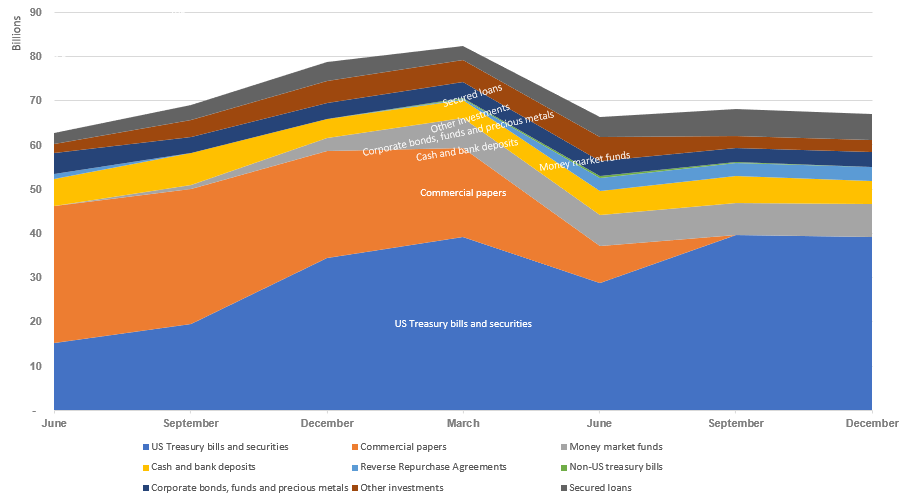

## BUSD reserves

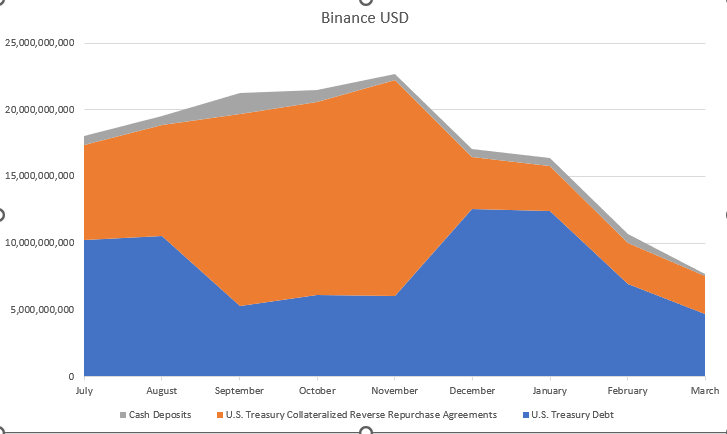

## USDC Reserves

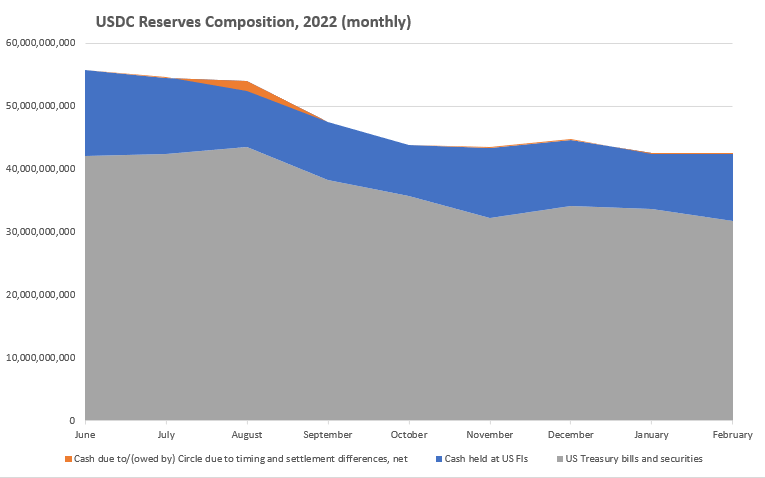

## PAXOS USDP reserves

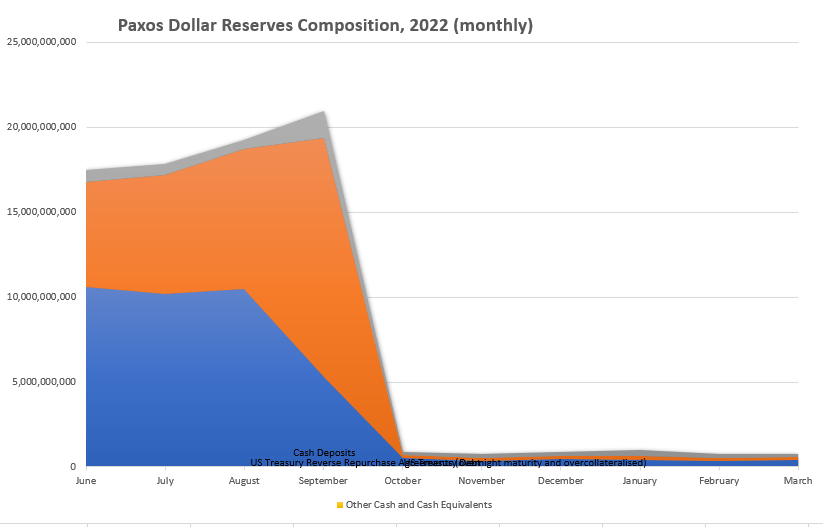

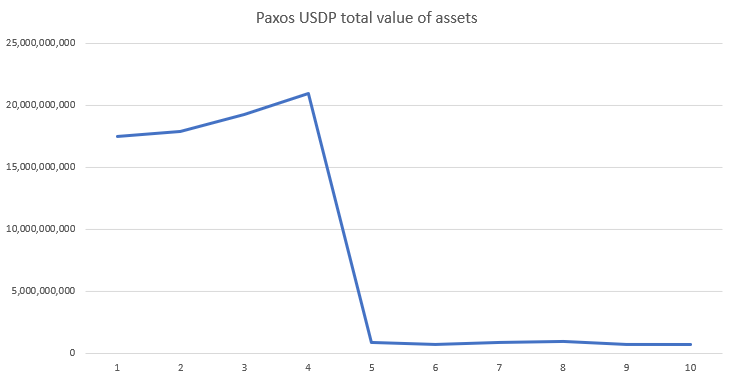

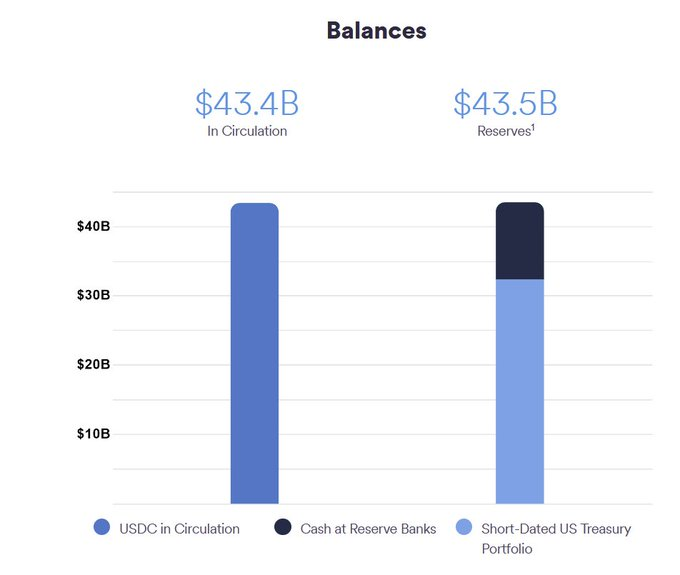

## TX COUNT

Stablecoin transactions refer to the transfer of units of a stablecoin between parties using distinct addresses. These transactions can involve sending or receiving stablecoins in exchange for other cryptocurrencies or fiat currencies, as well as using stablecoins to pay for goods and services.

To track the number of transactions, we look for transactions that involve the stablecoin as either the sender or recipient. They then filter out transactions that are not representative of actual economic activity, such as transactions that are sent to exchange addresses, or transactions that involve known market manipulators. All transactions, regardless of whether they successfully execute or involve the transfer of native units, are tallied. A single transaction may involve no transfers, one transfer, or multiple transfers.

Analysis of the total number of transactions provides information about the stablecoin's adoption, usage, growth, stability and demand.


In [24]:
df_txcnt=pd.read_excel(r'txcnt.xlsx')
df_txcnt.tail()

Time     BTC   BUSD     DAI   GUSD  HUSD    PAX   TUSD     USDC  \
5228  2023-04-28  484327  663.0  3485.0   99.0   1.0  135.0  145.0  33778.0   
5229  2023-04-29  487346  507.0  2764.0   39.0   0.0   45.0   77.0  26099.0   
5230  2023-04-30  561448  492.0  2846.0   21.0   0.0   96.0  378.0  30053.0   
5231  2023-05-01  685711  751.0  3325.0  102.0   0.0  136.0  446.0  40973.0   
5232  2023-05-02  460621  617.0  3107.0  121.0   0.0  108.0  293.0  38507.0   

      USDK   USDT  USDT_ETH   USDT_TRX  
5228    2.0  47.0  103299.0  2328922.0  
5229    0.0  31.0   76537.0  1923220.0  
5230    0.0  22.0   77851.0  1824052.0  
5231    0.0  12.0  100832.0  2262120.0  
5232    2.0   6.0  106852.0  2352418.0

In [25]:
df_txcnt=df_txcnt.fillna(0)
df_txcnt['Time'] = pd.to_datetime(df_txcnt['Time']).dt.date
df_txcnt

Time     BTC   BUSD     DAI   GUSD  HUSD    PAX   TUSD     USDC  \
0     2009-01-03       0    0.0     0.0    0.0   0.0    0.0    0.0      0.0   
1     2009-01-04       0    0.0     0.0    0.0   0.0    0.0    0.0      0.0   
2     2009-01-05       0    0.0     0.0    0.0   0.0    0.0    0.0      0.0   
3     2009-01-06       0    0.0     0.0    0.0   0.0    0.0    0.0      0.0   
4     2009-01-07       0    0.0     0.0    0.0   0.0    0.0    0.0      0.0   
...          ...     ...    ...     ...    ...   ...    ...    ...      ...   
5228  2023-04-28  484327  663.0  3485.0   99.0   1.0  135.0  145.0  33778.0   
5229  2023-04-29  487346  507.0  2764.0   39.0   0.0   45.0   77.0  26099.0   
5230  2023-04-30  561448  492.0  2846.0   21.0   0.0   96.0  378.0  30053.0   
5231  2023-05-01  685711  751.0  3325.0  102.0   0.0  136.0  446.0  40973.0   
5232  2023-05-02  460621  617.0  3107.0  121.0   0.0  108.0  293.0  38507.0   

      USDK   USDT  USDT_ETH   USDT_TRX  
0       0.0   0.0       0.0        0.0  
1       0.0   0.0       0.0        0.0  
2       0.0   0.0       0.0        0.0  
3       0.0   0.0       0.0        0.0  
4       0.0   0.0       0.0        0.0  
...     ...   ...       ...        ...  
5228    2.0  47.0  103299.0  2328922.0  
5229    0.0  31.0   76537.0  1923220.0  
5230    0.0  22.0   77851.0  1824052.0  
5231    0.0  12.0  100832.0  2262120.0  
5232    2.0   6.0  106852.0  2352418.0  

[5233 rows x 13 columns]

In [26]:
import plotly.graph_objs as go

colors = {'BUSD': '#C5DAEF',
          'DAI': '#92B2D5',
          'GUSD': '#F0D9AB',
          'PAX': '#E3AFC4',
          'USDC': '#EFC6AE',
          'USDT': '#D46960',
          'USDT_ETH': '#7BB3AF',
          'USDT_TRX':'#92B2D5'}

# Create a list of traces for each stablecoin
traces = []
for col in ['BUSD', 'DAI', 'GUSD', 'PAX', 'USDC', 'USDT', 'USDT_ETH', 'USDT_TRX']:
    traces.append(go.Scatter(x=df_txcnt['Time'], y=df_txcnt[col], fill='tonexty',
                             mode='none', name=col, fillcolor=colors[col], stackgroup='one'))

# Create the stacked area chart
fig = go.Figure(data=traces)

# Update the layout
fig.update_layout(title='Transaction Count of Stablecoins',
                  xaxis_title='Time',
                  yaxis_title='Transaction Count',
                  legend_title='Stablecoin',
                  hovermode='x unified',
                  margin=dict(l=50, r=50, b=50, t=50, pad=4),
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  font=dict(size=12, color='#7f7f7f'),
                  xaxis=dict(showgrid=False,
                             tickformat='%Y-%m-%d',
                             tickmode='array',
                             tickvals=df_txcnt['Time'].tolist()[::len(df_txcnt['Time'])//10],
                             rangeselector=dict(
                                 buttons=list([
                                     dict(count=7, label="1w", step="day", stepmode="backward"),
                                     dict(count=1, label="1m", step="month", stepmode="backward"),
                                     dict(count=6, label="6m", step="month", stepmode="backward"),
                                     dict(count=1, label="1y", step="year", stepmode="backward"),
                                     dict(step="all")
                                 ])
                             ),
                             rangeslider=dict(visible=True),
                             type="date"
                            ),
                  yaxis=dict(showgrid=False, tickformat='2s'))

# Update the legend orientation, position and xanchor
fig.update_layout(legend=dict(orientation='h',
                              y=-0.7,
                              x=0.5,
                              xanchor='center'))


# Show the chart
fig.show()


In [27]:
df_txvol=pd.read_excel(r'txtfradjntv.xlsx')
df_txvol=df_txvol.fillna(0)
df_txvol['Time'] = pd.to_datetime(df_txvol['Time']).dt.date
df_txvol

Time            BTC          BUSD           DAI         GUSD  \
0     2009-01-03       0.000000  0.000000e+00  0.000000e+00         0.00   
1     2009-01-04       0.000000  0.000000e+00  0.000000e+00         0.00   
2     2009-01-05       0.000000  0.000000e+00  0.000000e+00         0.00   
3     2009-01-06       0.000000  0.000000e+00  0.000000e+00         0.00   
4     2009-01-07       0.000000  0.000000e+00  0.000000e+00         0.00   
...          ...            ...           ...           ...          ...   
5228  2023-04-28  120190.092317  7.859455e+07  3.421142e+08    476755.20   
5229  2023-04-29   73575.782582  3.714289e+06  1.493638e+08     92397.47   
5230  2023-04-30   66210.886984  4.271904e+07  1.002321e+08     22657.56   
5231  2023-05-01  121161.982582  9.665767e+07  1.592269e+08  31992657.49   
5232  2023-05-02  136867.054999  1.797609e+08  1.750676e+08  38924404.19   

           HUSD           PAX          TUSD          USDC         USDK  \
0      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
1      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
2      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
3      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
4      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
...         ...           ...           ...           ...          ...   
5228  73.360719  1.046222e+08  2.650530e+08  3.516268e+09   562.642105   
5229   0.000000  1.444929e+07  2.159526e+06  1.880949e+09     0.000000   
5230   0.000000  9.991330e+06  5.668149e+07  1.128540e+09     0.000000   
5231   0.000000  8.346776e+07  7.884020e+07  2.687848e+09     0.000000   
5232   0.000000  6.771019e+07  1.382954e+08  3.388389e+09  1740.651944   

              USDT      USDT_ETH      USDT_TRX  
0     0.000000e+00  0.000000e+00  0.000000e+00  
1     0.000000e+00  0.000000e+00  0.000000e+00  
2     0.000000e+00  0.000000e+00  0.000000e+00  
3     0.000000e+00  0.000000e+00  0.000000e+00  
4     0.000000e+00  0.000000e+00  0.000000e+00  
...            ...           ...           ...  
5228  3.767150e+05  2.707000e+09  1.037670e+10  
5229  6.221660e+06  1.464792e+09  6.169488e+09  
5230  4.166047e+06  1.249854e+09  5.263238e+09  
5231  1.191759e+05  2.494773e+09  7.697869e+09  
5232  3.783458e+04  3.217247e+09  9.592345e+09  

[5233 rows x 13 columns]

In [28]:
df_txvol['usdt_total'] = df_txvol['USDT'] + df_txvol['USDT_ETH'] + df_txvol['USDT_TRX']
df_txvol

Time            BTC          BUSD           DAI         GUSD  \
0     2009-01-03       0.000000  0.000000e+00  0.000000e+00         0.00   
1     2009-01-04       0.000000  0.000000e+00  0.000000e+00         0.00   
2     2009-01-05       0.000000  0.000000e+00  0.000000e+00         0.00   
3     2009-01-06       0.000000  0.000000e+00  0.000000e+00         0.00   
4     2009-01-07       0.000000  0.000000e+00  0.000000e+00         0.00   
...          ...            ...           ...           ...          ...   
5228  2023-04-28  120190.092317  7.859455e+07  3.421142e+08    476755.20   
5229  2023-04-29   73575.782582  3.714289e+06  1.493638e+08     92397.47   
5230  2023-04-30   66210.886984  4.271904e+07  1.002321e+08     22657.56   
5231  2023-05-01  121161.982582  9.665767e+07  1.592269e+08  31992657.49   
5232  2023-05-02  136867.054999  1.797609e+08  1.750676e+08  38924404.19   

           HUSD           PAX          TUSD          USDC         USDK  \
0      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
1      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
2      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
3      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
4      0.000000  0.000000e+00  0.000000e+00  0.000000e+00     0.000000   
...         ...           ...           ...           ...          ...   
5228  73.360719  1.046222e+08  2.650530e+08  3.516268e+09   562.642105   
5229   0.000000  1.444929e+07  2.159526e+06  1.880949e+09     0.000000   
5230   0.000000  9.991330e+06  5.668149e+07  1.128540e+09     0.000000   
5231   0.000000  8.346776e+07  7.884020e+07  2.687848e+09     0.000000   
5232   0.000000  6.771019e+07  1.382954e+08  3.388389e+09  1740.651944   

              USDT      USDT_ETH      USDT_TRX    usdt_total  
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
4     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
...            ...           ...           ...           ...  
5228  3.767150e+05  2.707000e+09  1.037670e+10  1.308407e+10  
5229  6.221660e+06  1.464792e+09  6.169488e+09  7.640501e+09  
5230  4.166047e+06  1.249854e+09  5.263238e+09  6.517258e+09  
5231  1.191759e+05  2.494773e+09  7.697869e+09  1.019276e+10  
5232  3.783458e+04  3.217247e+09  9.592345e+09  1.280963e+10  

[5233 rows x 14 columns]

In [29]:
import plotly.graph_objs as go

colors = {'BUSD': '#C5DAEF',
          'DAI': '#92B2D5',
          'GUSD': '#F0D9AB',
          'PAX': '#E3AFC4',
          'USDC': '#EFC6AE',
          'usdt_total': '#D46960',
          'USDT_ETH': '#7BB3AF',
          'USDT_TRX':'#92B2D5'
          }

# Create a list of traces for each stablecoin
traces = []
for col in ['BUSD', 'DAI', 'GUSD', 'PAX', 'USDC', 'usdt_total', 'USDT_ETH', 'USDT_TRX']:
    traces.append(go.Scatter(x=df_txvol['Time'], y=df_txvol[col], fill='tonexty',
                             mode='none', name=col, fillcolor=colors[col], stackgroup='one'))

# Create the stacked area chart
fig = go.Figure(data=traces)

# Update the layout
fig.update_layout(title='Transaction Volume of Stablecoins',
                  xaxis_title='Time',
                  yaxis_title='Transaction Volume',
                  legend_title='Stablecoin',
                  hovermode='x unified',
                  margin=dict(l=50, r=50, b=50, t=50, pad=4),
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  font=dict(size=12, color='#7f7f7f'),
                  xaxis=dict(showgrid=False,
                             tickformat='%Y-%m-%d',
                             tickmode='array',
                             tickvals=df_txcnt['Time'].tolist()[::len(df_txcnt['Time'])//10],
                             rangeselector=dict(
                                 buttons=list([
                                     dict(count=7, label="1w", step="day", stepmode="backward"),
                                     dict(count=1, label="1m", step="month", stepmode="backward"),
                                     dict(count=6, label="6m", step="month", stepmode="backward"),
                                     dict(count=1, label="1y", step="year", stepmode="backward"),
                                     dict(step="all")
                                 ])
                             ),
                             rangeslider=dict(visible=True),
                             type="date"
                            ),
                  yaxis=dict(showgrid=False, tickformat='2s'))

# Update the legend orientation, position and xanchor
fig.update_layout(legend=dict(orientation='h',
                              y=-0.7,
                              x=0.5,
                              xanchor='center'))

# Show the chart
fig.show()


Note that G stands for 10^9


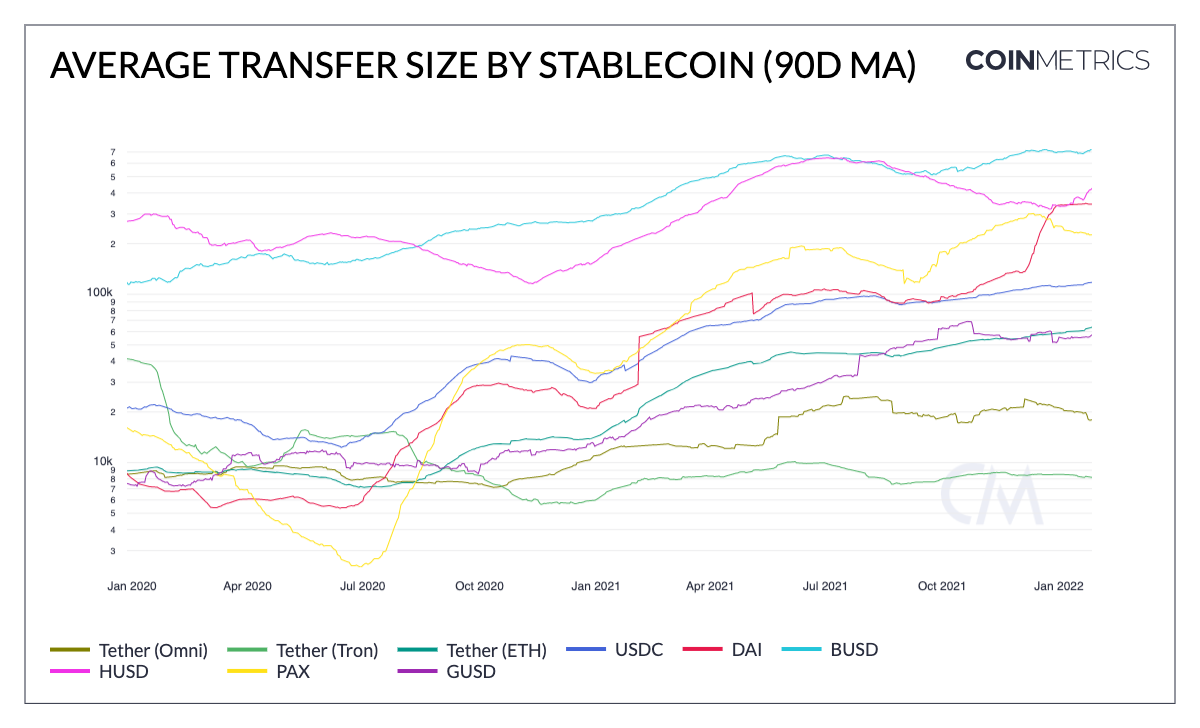

### Share of Supply

The supply of a stablecoin refers to the total amount of stablecoins in circulation which is calculated by tracking the number of stablecoins that have been issued. This metric indicates the actual adoption and usage of the stablecoin, as well as changes in demand and potential market trends.


The active supply of stablecoins is calculated by tracking the amount of stablecoins held in addresses controlled by the issuer, as well as the amount held in other addresses on the network. To ensure accuracy, we apply filters to remove inactive or unused addresses and exclude exchange addresses.  


In [30]:
df_splycur=pd.read_excel(r'splycur.xlsx')
df_splycur=df_splycur.fillna(0)
df_splycur['Time'] = pd.to_datetime(df_splycur['Time']).dt.date
df_splycur

Time           BTC          BUSD           DAI          GUSD  \
0     2009-01-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     2009-01-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2     2009-01-05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3     2009-01-06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4     2009-01-07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...          ...           ...           ...           ...           ...   
5228  2023-04-28  1.935869e+07  6.197081e+09  4.731830e+09  4.868895e+08   
5229  2023-04-29  1.935954e+07  6.197081e+09  4.732466e+09  4.869502e+08   
5230  2023-04-30  1.936047e+07  6.197081e+09  4.735754e+09  4.869502e+08   
5231  2023-05-01  1.936161e+07  6.155960e+09  4.728176e+09  4.971080e+08   
5232  2023-05-02  1.936241e+07  6.090958e+09  4.700713e+09  5.050183e+08   

              HUSD           PAX          TUSD          USDC      USDK  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
2     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
4     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
...            ...           ...           ...           ...       ...   
5228  1.878170e+08  1.041057e+09  7.557492e+08  2.887689e+10  488711.0   
5229  1.878170e+08  1.041057e+09  7.557375e+08  2.889160e+10  488711.0   
5230  1.878170e+08  1.041057e+09  7.557133e+08  2.888917e+10  488711.0   
5231  1.878170e+08  1.041057e+09  8.246761e+08  2.876599e+10  488711.0   
5232  1.878170e+08  1.046735e+09  8.619901e+08  2.863430e+10  488711.0   

             USDT      USDT_ETH      USDT_TRX  
0             0.0  0.000000e+00  0.000000e+00  
1             0.0  0.000000e+00  0.000000e+00  
2             0.0  0.000000e+00  0.000000e+00  
3             0.0  0.000000e+00  0.000000e+00  
4             0.0  0.000000e+00  0.000000e+00  
...           ...           ...           ...  
5228  888000000.0  3.628319e+10  4.513264e+10  
5229  888000000.0  3.628319e+10  4.513264e+10  
5230  888000000.0  3.628319e+10  4.513264e+10  
5231  888000000.0  3.628319e+10  4.513264e+10  
5232  888000000.0  3.628319e+10  4.513264e+10  

[5233 rows x 13 columns]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


#assets = ['usdt', 'usdc', 'dai','busd','usdt_eth','usdt_trx','tusd','gusd','husd']
color_scale1 = ['#C5DAEF','#92B2D5','#F0D9AB',  '#E3AFC4', '#EFC6AE','#D46960', '#B3BBEB','#808DDE','#B0D1CF']

# Calculate the total value for each row
df_splycur['total'] = df_splycur['BUSD'] + df_splycur['DAI'] + df_splycur['USDC'] +df_splycur['GUSD'] +df_splycur['PAX'] +df_splycur['USDT']+df_splycur['USDT_ETH']+df_splycur['USDT_TRX']

# Calculate the percentage of each asset for each row
df_splycur['busd_pct'] = df_splycur['BUSD'] / df_splycur['total']
df_splycur['dai_pct'] = df_splycur['DAI'] / df_splycur['total']
df_splycur['usdc_pct'] = df_splycur['USDC'] / df_splycur['total']
df_splycur['usdt_pct'] = df_splycur['USDT'] / df_splycur['total']
df_splycur['usdt_eth_pct'] = df_splycur['USDT_ETH'] / df_splycur['total']
df_splycur['usdt_trx_pct'] = df_splycur['USDT_TRX'] / df_splycur['total']
df_splycur['gusd_pct'] = df_splycur['GUSD'] / df_splycur['total']
df_splycur['pax_pct'] = df_splycur['PAX'] / df_splycur['total']
color_scale = ['#C5DAEF', '#92B2D5', '#F0D9AB', '#E3AFC4', '#EFC6AE', '#EFC6AE','#EFC6AE','#D46960', '#B3BBEB']

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['busd_pct'], mode='lines', name='BUSD', fill='tonexty', line=dict(color=color_scale1[2])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['dai_pct'], mode='lines', name='DAI', fill='tonexty', line=dict(color=color_scale1[3])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['usdc_pct'], mode='lines', name='USDC', fill='tonexty', line=dict(color=color_scale1[4])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['pax_pct'], mode='lines', name='PAX', fill='tonexty', line=dict(color=color_scale1[5])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['gusd_pct'], mode='lines', name='GUSD', fill='tonexty', line=dict(color=color_scale1[6])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['usdt_pct'], mode='lines', name='USDT', fill='tonexty', line=dict(color=color_scale1[8])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['usdt_eth_pct'], mode='lines', name='USDT_ETH', fill='tonexty', line=dict(color=color_scale1[8])))
fig.add_trace(go.Scatter(x=df_splycur['Time'], y=df_splycur['usdt_trx_pct'], mode='lines', name='USDT_TRX', fill='tonexty', line=dict(color=color_scale1[8])))

fig.update_layout(title='Share of Total Stablecoin Supply',
                  xaxis_title='Date',
                  yaxis_title='Percentage',
                  hovermode='x unified',
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False, tickformat='%'),
                  template='plotly_white')

fig.update_traces(stackgroup='one', hovertemplate='%{y:2%}')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

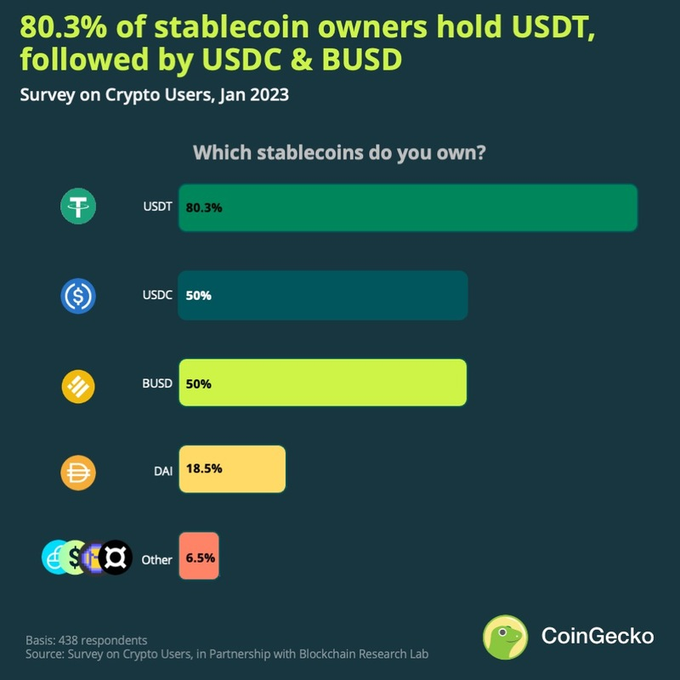